<a href="https://colab.research.google.com/github/ronakraut2004/Sentiment-Analysis-of-twiter/blob/main/sentiment_analysis_twiter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
import pandas as pd

# Load the dataset (your file path might vary if you're running locally)
df = pd.read_csv('/Twitter_Data.csv')
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


data preprocessing and cleaning

In [ ]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\s{2,}', ' ', text)  # remove extra spaces
    return text.strip()

df['clean_text'] = df['clean_text'].astype(str).apply(clean_text)
df[['clean_text', 'category']].head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Step 4: Feature Extraction using TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']


In [ ]:
# Remove rows where 'category' is NaN
df = df.dropna(subset=['category'])

# Confirm if any missing values remain
print("Null values in category column:", df['category'].isnull().sum())


Null values in category column: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Train the Model (Naive Bayes)

In [ ]:

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Evaluate the Model

Accuracy: 0.7073784322748888

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.45      0.59      7230
         0.0       0.78      0.65      0.71     10961
         1.0       0.64      0.89      0.75     14404

    accuracy                           0.71     32595
   macro avg       0.76      0.66      0.68     32595
weighted avg       0.74      0.71      0.70     32595



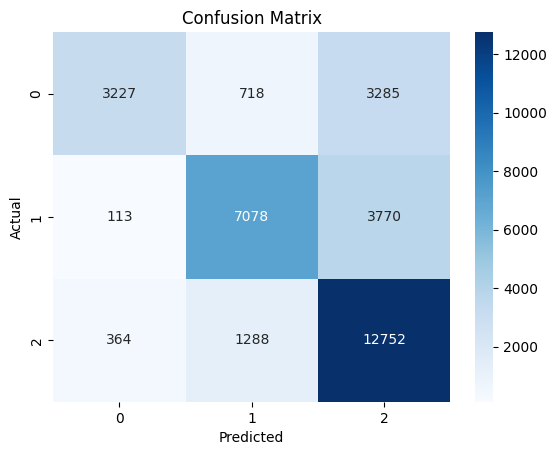

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-20-3017228753>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set2')


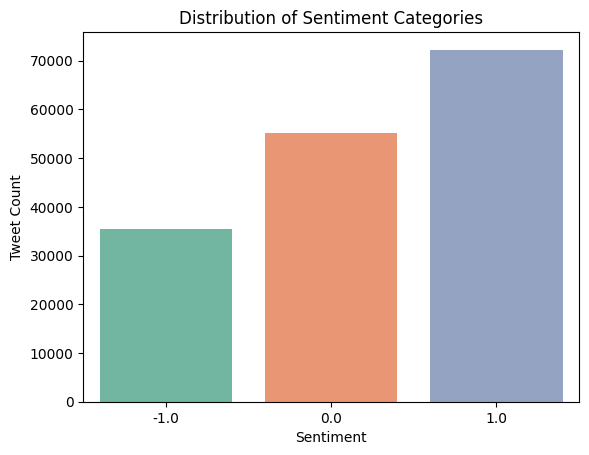

In [ ]:
sns.countplot(data=df, x='category', palette='Set2')
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()
